# AI-Powered Job Market Insights: Exploring Automation Risk, Skill Demands, and Future Employment Trends
## Introduction
   The dataset I chose was the "AI-Powered Job Market Insights" from https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights. This dataset provides a synthetic yet highly realistic snapshot of today's evolving job market, with a special emphasis on artificial intelligence (AI) and automation across various industries. This dataset includes 500 records and 10 attributes, such as job title, industry, company size, location, AI adoption level, automation risk, required skills, salary, remote friendliness, and job growth projection. 
   
   I chose this dataset because Ai's impact on the future of work is a widely discussed topic, and I wanted to explore which jobs are most at risk of automation, how AI adoption caries across industries, and what skills are becoming more critical as AI continues to evolve. 
   
   This dataset is well-suited for this project because it meets the requirements of having at least 8-10 attributes and 500+ records, allowing for a comprehensive application of data mining techniques, including data preprocessing, feature engineering, regression modeling, classification, clustering, and association rule mining. This dataset's attributes makes it ideal for uncovering meaningful trends and deriving insights that align with the project's objective of solving real-world problem through data analysis.
    

## Task 1: Loading the data set using Pandas and inspecting its structure

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
#Loads the dataset using Pandas
df = pd.read_csv("dataset.csv")

In [82]:
#only gives you 5 entries
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [83]:
#gives you a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


We are just gonna see how many of each job titles there are:

In [84]:
#shows how many of each jobs there are
df.Job_Title.value_counts().sort_values(ascending=False)

Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: Job_Title, dtype: int64

# Task 2: Data cleaning

Find the total number of mising values in each columns

In [7]:
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

After checking for missing values, we found that the column are complete with no missing data. 

We are going to now remove any duplicates by using the drop_duplicates() method

In [9]:
df = df.drop_duplicates()

Check for any inconsistent data by using the .unique() method to make sure that values are unique for each column making sure that only what is expected will be printed out

In [11]:
df['Job_Title'].unique()

array(['Cybersecurity Analyst', 'Marketing Specialist', 'AI Researcher',
       'Sales Manager', 'UX Designer', 'HR Manager', 'Product Manager',
       'Software Engineer', 'Data Scientist', 'Operations Manager'],
      dtype=object)

In [10]:
df['Industry'].unique()

array(['Entertainment', 'Technology', 'Retail', 'Education', 'Finance',
       'Transportation', 'Telecommunications', 'Manufacturing',
       'Healthcare', 'Energy'], dtype=object)

In [18]:
df['Company_Size'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

In [13]:
df['AI_Adoption_Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [14]:
df['Automation_Risk'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [15]:
df['Remote_Friendly'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['Job_Growth_Projection'].unique()

array(['Growth', 'Decline', 'Stable'], dtype=object)

Check to see if there are any inconsistant values in the different columns, for examples if some entries were tech instead of technology. But since the columns are consistant we are good to move on to the next step. 

round to the nearest whole number since more salaries are reported in whole dollars, this makes it easier to read and interpret. Showing the cents doesn't really add meaningful precision.

In [26]:
df['Salary_USD']=df['Salary_USD'].round()

In [27]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.0,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93793.0,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.0,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93028.0,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87753.0,Yes,Decline


In [29]:
df['Salary_USD'].describe()

count       500.000000
mean      91222.428000
std       20504.275932
min       31970.000000
25%       78511.250000
50%       91998.000000
75%      103971.750000
max      155210.000000
Name: Salary_USD, dtype: float64

To check for potential noisy data, we can check for possible outliers. We can use the IQR (interquartile range) rule.

First we will get the IQR with this equation: 

IQR = Q3 - Q1

= 103,971.75 - 78,511.25

= 25,460.50

Then we find the Upper bound: 

Q3 + 1.5 * IQR

= 103,971.75 + (1.5 * 25,460.50)

= 103,971.75 + 38,190.75

= 142,162.50

Then we find the lower bound:

Q1 - 1.5 * IQR

= 78,511.25 - (1.5 * 25,460.50)

= 78,511.25 - 38,190.75

= 40,320.50

The max value which is 155,210 is above the upper bound which could be a possible high-end outlier

The min value which is 31,970 is below the lower bound which could be a possible low-end outlier

These don't necessary mean that these are noisy data, the high-end outlier could be for a executive role and the low-end outlier could be an entry level role.

# Task 3: Exploratory Data Anaylsis (EDA)

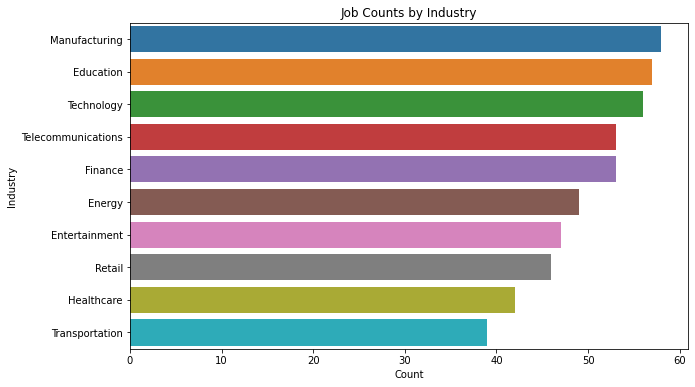

In [86]:
#displays a count plot of which industry had the most jobs
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Industry'], order=df['Industry'].value_counts().index)
plt.title('Job Counts by Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

In the graph above it shows that there are alot more job in the Manufacturing industry.

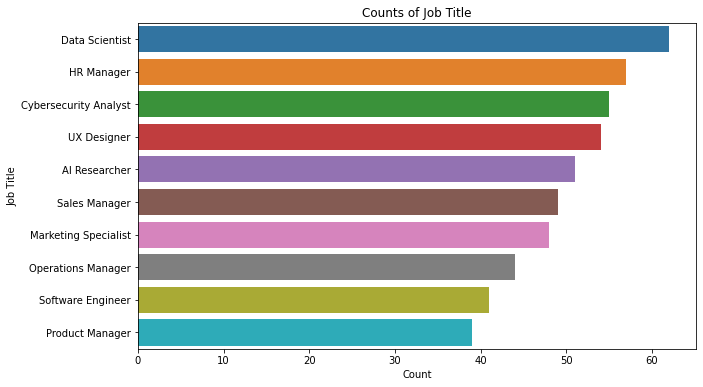

In [88]:
#displays a count plot of the number of each job title
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Job_Title'], order=df['Job_Title'].value_counts().index)
plt.title('Counts of Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In the graph above it shows that there are alot more jobs as data scientist.

In [91]:
#counts the number of occurrences of each unique value 
adoption_counts = df['AI_Adoption_Level'].value_counts()

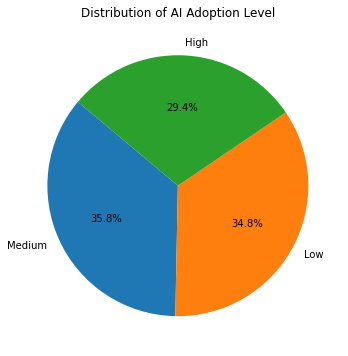

In [92]:
#creates a new figure
plt.figure(figsize=(6, 6))
#creates a pie chart
plt.pie(adoption_counts, labels=adoption_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AI Adoption Level')
plt.show()

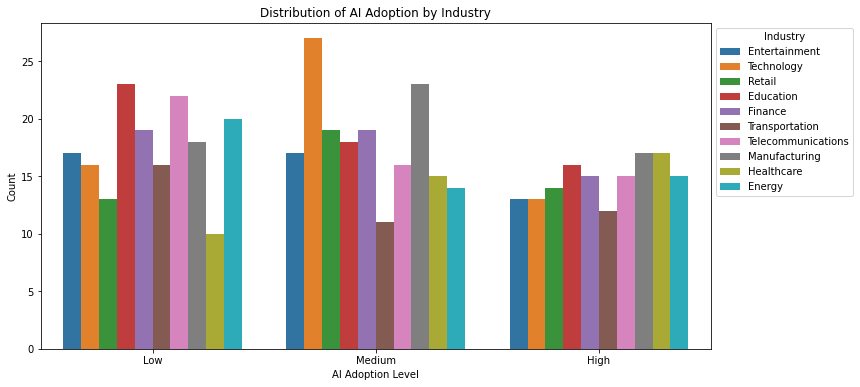

In [89]:
#creates a figure for the plot
plt.figure(figsize=(12, 6))
#using seaborns countplot which industry is using AI the most
sns.countplot(data=df, x='AI_Adoption_Level', hue='Industry', order=['Low', 'Medium', 'High'])
plt.title('Distribution of AI Adoption by Industry')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

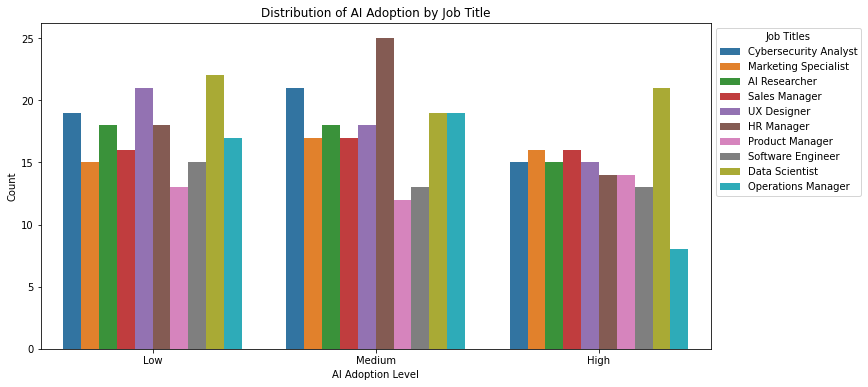

In [93]:
plt.figure(figsize=(12, 6))
#creates a goruped count plot using seaborn 
sns.countplot(data=df, x='AI_Adoption_Level', hue='Job_Title', order=['Low', 'Medium', 'High'])
plt.title('Distribution of AI Adoption by Job Title')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
#adds the key outside of the figure
plt.legend(title='Job Titles',bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

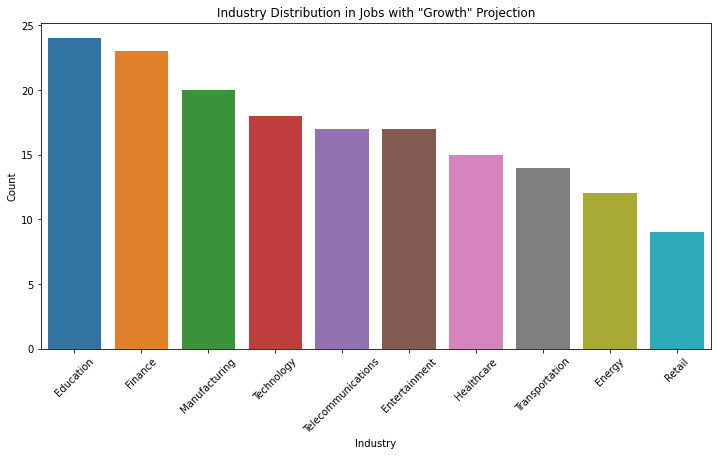

In [94]:
#creates a new dataframe containing only rows where 'Job_Growth_Projection' is 'Growth'
growth_df = df[df['Job_Growth_Projection'] == 'Growth']
plt.figure(figsize=(12, 6))
#creates a count plot showing the number of 'Growth' jobs in each industry
sns.countplot(x='Industry', data=growth_df, order=growth_df['Industry'].value_counts().index)
#adds title
plt.title('Industry Distribution in Jobs with "Growth" Projection')
#add the title for x axis
plt.xlabel('Industry')
#add the title for y axis
plt.ylabel('Count')
#rotates the labels for the x axis so everything fits
plt.xticks(rotation=45)
plt.show()

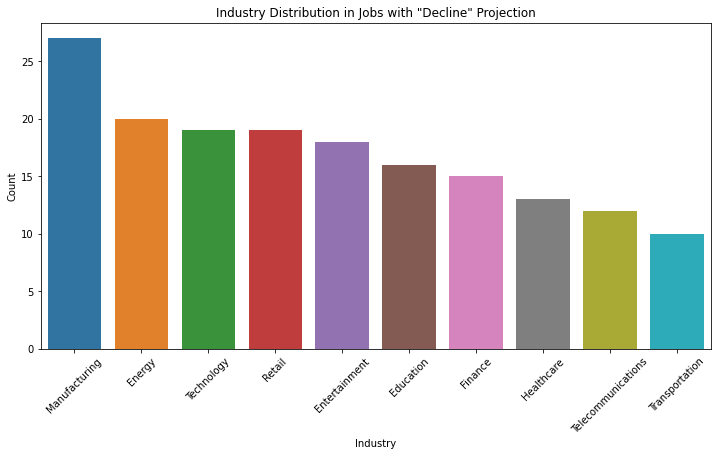

In [72]:
growth_df = df[df['Job_Growth_Projection'] == 'Decline']
plt.figure(figsize=(12, 6))
sns.countplot(x='Industry', data=growth_df, order=growth_df['Industry'].value_counts().index)
plt.title('Industry Distribution in Jobs with "Decline" Projection')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

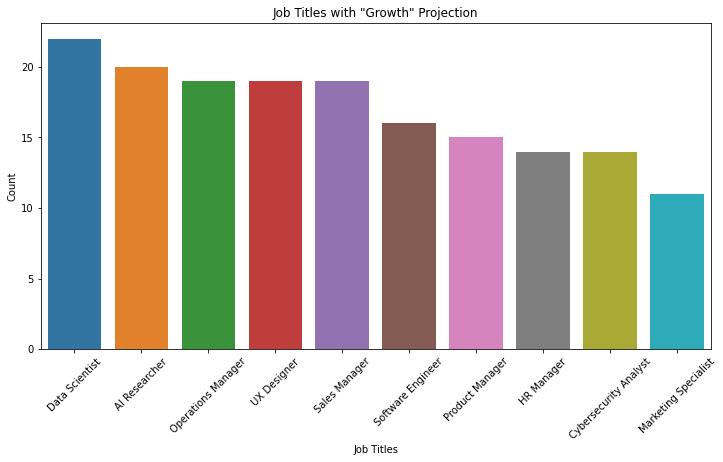

In [76]:
growth_df = df[df['Job_Growth_Projection'] == 'Growth']
plt.figure(figsize=(12, 6))
sns.countplot(x='Job_Title', data=growth_df, order=growth_df['Job_Title'].value_counts().index)
plt.title('Job Titles with "Growth" Projection')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


count       500.000000
mean      91222.390974
std       20504.291453
min       31969.526346
25%       78511.514863
50%       91998.195286
75%      103971.282092
max      155209.821614
Name: Salary_USD, dtype: float64
                 Job_Title            Industry     Salary_USD
182         Data Scientist      Transportation   31969.526346
289         Data Scientist          Healthcare  148467.112346
384  Cybersecurity Analyst  Telecommunications   33601.381360
420   Marketing Specialist             Finance  155209.821614
425            UX Designer       Entertainment   35963.297317


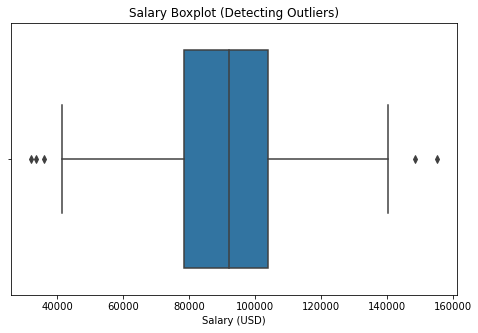

In [90]:
#prints the summary stats for the salary column
print(df['Salary_USD'].describe())

#gives you the first and thrid quartile
Q1 = df['Salary_USD'].quantile(0.25)
Q3 = df['Salary_USD'].quantile(0.75)

#gives the interquartile range
IQR = Q3 - Q1

#gives you the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#this identifies the outliers for the salaries 
outliers = df[(df['Salary_USD'] < lower_bound) | (df['Salary_USD'] > upper_bound)]
print(outliers[['Job_Title', 'Industry', 'Salary_USD']])

#plots a boxplot to show salary distribution and outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Salary_USD'])
plt.title('Salary Boxplot (Detecting Outliers)')
plt.xlabel('Salary (USD)')
plt.show()


In [80]:
max_salary_row = df[df['Salary_USD'] == df['Salary_USD'].max()]
print(max_salary_row[['Job_Title', 'Industry', 'Location', 'Company_Size', 'Salary_USD']])

                Job_Title Industry       Location Company_Size  Salary_USD
420  Marketing Specialist  Finance  San Francisco       Medium    155210.0


There are a couple high-end and low-end outliers that I will need to look into, but for the time being I will assume that because one of the highest paying jobs is in Finance it makes sense.

# Task 5: Insights from EDA process

 From my EDA process I found that most salaries range between $78k and $140K with a few high outliers like Marketing Specialist in Finace at $155k and low outliers like Data Scientist at $32K. Outliers may represent special postions and need careful treatment to avoid skewing models. 
 
 From the job title distribution data scientist is the most common job title, followed by HR Manager, Cybersecurity Analyst, and others. This suggest focus areas for building predicitve models like predicitng salaries or growth for these popular roles.  Job title could be a strong predictive feature for job growth potention.
 
 From the AI adoption distribution, different job titles and industries show varying adoption levels, for example high AI adoption is more common in Technology and Finance and is lower in entertainment and retail. Interaction between AI adoption and industry may affect job risk or growth potential. 
 
 